In [ ]:
# Jupyter notebook Kernel Restart

from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

In [1]:
import os
from glob import glob
import shutil
import itertools
from datetime import datetime
from tqdm import tqdm_notebook
from datetime import datetime
import pandas as pd
import random

import seaborn as sns
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from keras.models import Model, load_model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
from keras.regularizers import l1, l2


# from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D,
# from keras.layers import MaxPooling2D, ZeroPadding2D, AveragePooling2D

%matplotlib inline

Using TensorFlow backend.


## 경로 설정

In [2]:
seed_value= 777

random.seed(seed_value)
np.random.seed(seed_value)
tf.set_random_seed(seed_value)

In [3]:
data_dir1 = 'Dataset/'
fold_dir = '22_AOI_HDI_dim1_Gvis_Bin1/'
data_dir = data_dir1+fold_dir

train_dir = data_dir + 'Train/'
test_dir = data_dir + 'Test/'

input_shape = (100, 100, 1)
h, w, c = input_shape

batch_size = 24
num_classes = len(os.listdir(train_dir))
# num_epochs = 20
data_augmentation = True


learning_rate = 0.001

In [4]:
train_path = glob(os.path.join(train_dir, '*/*.jpg'))
num_dataset = len(train_path)
steps_per_epoch = num_dataset // batch_size

test_paths = glob(os.path.join(test_dir, '*/*.jpg'))
num_testset = len(test_paths)
steps_per_validation = num_testset // batch_size

path = train_path[0]
path

'Dataset/22_AOI_HDI_dim1_Gvis_Bin1/Train\\Bad\\101_open-M7830486304_32_5_VRS0_AOI4_Defect.jpg'

In [5]:
image = np.array(Image.open(path).convert("L"))
image = np.expand_dims(image, -1)
print('num_classes : ',num_classes)
print('image.shape : ',image.shape)

num_classes :  2
image.shape :  (100, 100, 1)


In [6]:
# # VGG16

# inputs = layers.Input(input_shape)
# net = layers.Conv2D(64, (3, 3), padding='same')(inputs)
# net = layers.Conv2D(64, (3, 3), padding='same')(net)
# net = layers.Conv2D(64, (3, 3), padding='same')(net)
# net = layers.BatchNormalization()(net)
# net = layers.Activation('relu')(net)
# net = layers.MaxPooling2D(pool_size=(2, 2))(net)

# net = layers.Conv2D(128, (3, 3), padding='same')(net)
# net = layers.Conv2D(128, (3, 3), padding='same')(net)
# net = layers.Conv2D(128, (3, 3), padding='same')(net)
# net = layers.BatchNormalization()(net)
# net = layers.Activation('relu')(net)
# net = layers.MaxPooling2D(pool_size=(2, 2))(net)
# net = layers.Dropout(0.25)(net)

# net = layers.Conv2D(256, (3, 3), padding='same')(net)
# net = layers.Conv2D(256, (3, 3), padding='same')(net)
# net = layers.Conv2D(256, (3, 3), padding='same')(net)
# net = layers.BatchNormalization()(net)
# net = layers.Activation('relu')(net)
# net = layers.MaxPooling2D(pool_size=(2, 2))(net)
# net = layers.Dropout(0.25)(net)

# net = layers.Conv2D(512, (3, 3), padding='same')(net)
# net = layers.Conv2D(512, (3, 3), padding='same')(net)
# net = layers.Conv2D(512, (3, 3), padding='same')(net)
# net = layers.BatchNormalization()(net)
# net = layers.Activation('relu')(net)
# net = layers.MaxPooling2D(pool_size=(2, 2))(net)
# net = layers.Dropout(0.25)(net)

# net = layers.Conv2D(512, (3, 3), padding='same')(net)
# net = layers.Conv2D(512, (3, 3), padding='same')(net)
# net = layers.Conv2D(512, (3, 3), padding='same')(net)
# net = layers.BatchNormalization()(net)
# net = layers.Activation('relu')(net)
# net = layers.MaxPooling2D(pool_size=(2, 2))(net)
# net = layers.Dropout(0.25)(net)

# net = layers.GlobalAveragePooling2D()(net)
# net = layers.Flatten()(net)
# net = layers.Dense(512)(net)
# net = layers.Activation('relu')(net)
# net = layers.Dropout(0.5)(net)
# net = layers.Dense(num_classes)(net)
# net = layers.Activation('softmax')(net)

# model = tf.keras.Model(inputs=inputs, outputs=net)

In [7]:
# DenseNet 121

# base_model = tf.keras.applications.densenet.DenseNet121(weights=None, input_shape=input_shape,include_top=False)

# net = base_model.output
# net = layers.GlobalAveragePooling2D()(net)
# net = layers.Flatten()(net)
# net = layers.Dense(1024,activation='relu', kernel_regularizer=l2(0.01))(net)
# net = layers.Dense(512,activation='relu',  kernel_regularizer=l2(0.01))(net)
# #net = layers.Dropout(0.3)(net)
# net = layers.Dense(num_classes, activation='softmax', name='fc1000')(net)

# model = tf.keras.Model(inputs=base_model.input,outputs=net)

In [92]:
# # ResNet 50 Default

# base_model = tf.keras.applications.resnet50.ResNet50(weights=None, input_shape=input_shape,include_top=False)

# net = base_model.output
# net = layers.GlobalAveragePooling2D()(net)
# net = layers.Dense(1024,activation='relu')(net)
# net = layers.Dense(1024,activation='relu')(net)
# net = layers.Dense(512,activation='relu')(net)
# net = layers.Dense(num_classes, activation='softmax')(net)
# model = tf.keras.Model(inputs=base_model.input,outputs=net)

C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  x = layers.GlobalAveragePooling2D()(x)


In [6]:
# ResNet 50 regulize + dropout

base_model = tf.keras.applications.resnet50.ResNet50(weights=None, input_shape=input_shape,include_top=False)

net = base_model.output
net = layers.GlobalAveragePooling2D()(net)
net = layers.Flatten()(net)
net = layers.Dense(1024,activation='relu', kernel_regularizer=l2(0.001))(net)
net = layers.Dense(512,activation='relu',  kernel_regularizer=l2(0.001))(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes, activation='softmax', name='fc1000')(net)

model = tf.keras.Model(inputs=base_model.input,outputs=net)

C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:275: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [49]:
# # ResNet 50

# base_model = tf.keras.applications.resnet50.ResNet50(weights=None, input_shape=input_shape,include_top=False)

# net = base_model.output
# net = layers.GlobalAveragePooling2D()(net)
# net = layers.Flatten()(net)
# net = layers.Dense(1024,activation='relu')(net)
# net = layers.Dense(num_classes, activation='softmax', name='fc1000')(net)

# model = tf.keras.Model(inputs=base_model.input,outputs=net)

In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 1)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 50, 64)   3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 50, 50, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [8]:
# learning_rate = 0.01
# learning_rate = 0.0001

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate),
              #optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        width_shift_range = 0.05,
        height_shift_range = 0.05,
        zoom_range = 0.03,
        brightness_range = [0.7,1.0], # 밝기[min,max]
#        fill_mode='nearest',
#        rotation_range = 90, # 돌리기 0 ~ 90
#        shear_range = 0.2,   # 비틀기
        vertical_flip = True,
        horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(h, w),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
#     save_to_dir='out_images'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(h, w),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical')

Found 15315 images belonging to 2 classes.
Found 3120 images belonging to 2 classes.


In [10]:
MODEL_PATH = 'Model'
FOLD_PATH = fold_dir
MODEL_SAVE_FOLDER_PATH = os.path.join(MODEL_PATH,FOLD_PATH)
if not os.path.exists(MODEL_PATH):
    os.mkdir(MODEL_PATH)
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
    os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '{val_loss:.4f}.hdf5'

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=model_path,
        monitor='val_loss',
        verbose=1,
        save_best_only=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
#        monitor='val_acc',
        monitor='val_loss',
        factor=0.05, # 콜백이 호출되면 학습률을 x배 줄임
        patience=5  # 몇 번 확인 후 안 오르면 학습률을 줄임
    ),
    # `val_loss`가 n번의 에포크에 걸쳐 향상되지 않으면 훈련을 멈춥니다.
    tf.keras.callbacks.EarlyStopping(patience=30, monitor='val_loss'),
    # `./logs` 디렉토리에 텐서보드 로그를 기록합니다.
    tf.keras.callbacks.TensorBoard(log_dir='./Logs/'+FOLD_PATH)
]

In [11]:
# model.load_weights(loading_path)

In [12]:
model_list = os.listdir(MODEL_SAVE_FOLDER_PATH)
model_count=len(model_list)

if model_count == 0:
    loading_path=[]
    pass
else:
    model_list.sort()
    loading_path = MODEL_SAVE_FOLDER_PATH + model_list[0]
#    model = tf.keras.models.load_model(loading_path)
    model.load_weights(loading_path)
loading_path

[]

In [23]:
if not len(model_list) <= 5:
    n = 1
    for i in model_list:
        if not n <= 5:
            del_model = MODEL_SAVE_FOLDER_PATH + i
            os.remove(del_model)
            print('Delete : ' + MODEL_SAVE_FOLDER_PATH + i)
        n+=1

In [25]:
# model.compile(loss='categorical_crossentropy',
#               optimizer=tf.keras.optimizers.Adam(learning_rate),
#               metrics=['accuracy'])

# # model evaluation
# score = model.evaluate(validation_generator, 
#                          steps=10,
#                          verbose=1)
# # print("%s : %.2f%%" % (score[1], score[0]*100))
# score

In [13]:
steps_per_epoch, steps_per_validation

(638, 130)

In [ ]:
history = model.fit_generator(
                        train_generator,
                        steps_per_epoch=steps_per_epoch,
                        epochs=100,
                        validation_data=validation_generator,
                        validation_steps=steps_per_validation,
                        callbacks=callbacks,
                        verbose=2)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 10.98896, saving model to Model\22_AOI_HDI_dim1_Gvis_Bin1/10.9890.hdf5
 - 226s - loss: 22.6212 - acc: 0.7534 - val_loss: 10.9890 - val_acc: 0.4981
Epoch 2/100

Epoch 00002: val_loss improved from 10.98896 to 5.40553, saving model to Model\22_AOI_HDI_dim1_Gvis_Bin1/5.4055.hdf5
 - 202s - loss: 7.5100 - acc: 0.8338 - val_loss: 5.4055 - val_acc: 0.7933
Epoch 3/100

Epoch 00003: val_loss improved from 5.40553 to 3.73304, saving model to Model\22_AOI_HDI_dim1_Gvis_Bin1/3.7330.hdf5
 - 204s - loss: 4.2005 - acc: 0.8575 - val_loss: 3.7330 - val_acc: 0.6276
Epoch 4/100

Epoch 00004: val_loss improved from 3.73304 to 2.29157, saving model to Model\22_AOI_HDI_dim1_Gvis_Bin1/2.2916.hdf5
 - 203s - loss: 2.6352 - acc: 0.8708 - val_loss: 2.2916 - val_acc: 0.8952
Epoch 5/100

Epoch 00005: val_loss did not improve from 2.29157
 - 202s - loss: 1.8533 - acc: 0.8733 - val_loss: 2.8037 - val_acc: 0.7696
Epoch 6/100

Epoch 00006: val_loss did not improv

In [35]:
# for epoch in range(num_epochs):

#     history = model.fit_generator(
#                         train_generator,
#                         steps_per_epoch=steps_per_epoch,
#                         epochs=1,
#                         validation_data=validation_generator,
#                         validation_steps=steps_per_validation,
#                         callbacks=callbacks,
#                         verbose=2)
    
#     save_name = '%.4f' % history.history['val_acc'][-1]
#     model.save(MODEL_SAVE_FOLDER_PATH+"Model_%s.h5" % save_name)

Epoch 1/1


KeyboardInterrupt: 

In [ ]:
# from keras.utils import plot_model
# # // 케라스 모델인 model을 보기 쉽게 model.png 파일에 이미지로 떨어뜨려 준다.  
# # // show_shapes = True, layer의 input과 output의 shape을 같이 보여준다.  
# # // show_layers_name = True, layer 이름을 같이 보여 준다.  
# # // rankdir = TB | LR, TB면 수직으로, LR 수평으로 그려준다.  
# plot_model ( model, to_file='model.png', show_shapes=True )

In [21]:
# save_name = '%.4f' % history.history['val_loss'][-1]
model.save(MODEL_SAVE_FOLDER_PATH+"Model.h5")

In [82]:
model.evaluate_generator(validation_generator, 
                         steps=10,
                         verbose=1)

10/10 [==============================] - ETA: 35s - ETA: 19s - ETA: 13s - ETA: 9s  - ETA: 7s - ETA: 5s - ETA: 3s - ETA: 2s - ETA: 1s - 12s 1s/step


[1.0433546751737595, 0.8000000059604645]

In [83]:
# Test set check

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(h, w),
    batch_size=2120,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True)

Found 2120 images belonging to 22 classes.


In [84]:
from sklearn.metrics import confusion_matrix
image, label = next(test_set)
logits = model.predict(image)
image.shape

(2120, 100, 100, 1)

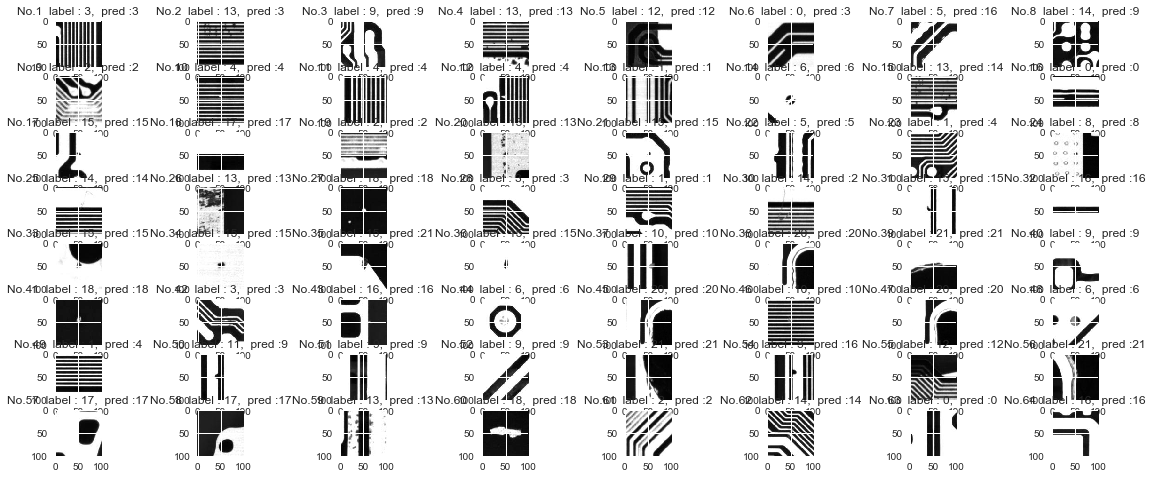

In [66]:
num_image = image.shape[0]
num_col = 8
a = num_image // num_col
plt.figure(figsize = (20, 8))

for i in range (num_image):
    #print(a, num_col, b+1)
    
    plt.subplot(a, num_col,i+1)
    plt.title('No.'+str(i+1)+'  label : '+ str(np.argmax(label[i],-1))+',  pred :' + str(np.argmax(logits[i],-1)))
    plt.imshow(image[i, :, :,0], cmap='gray')
    #plt.imshow(image[i, :, :,0], cmap='RdBu')
    #plt.imshow(image[i, :, :,0], cmap='jet')
plt.show()

OK


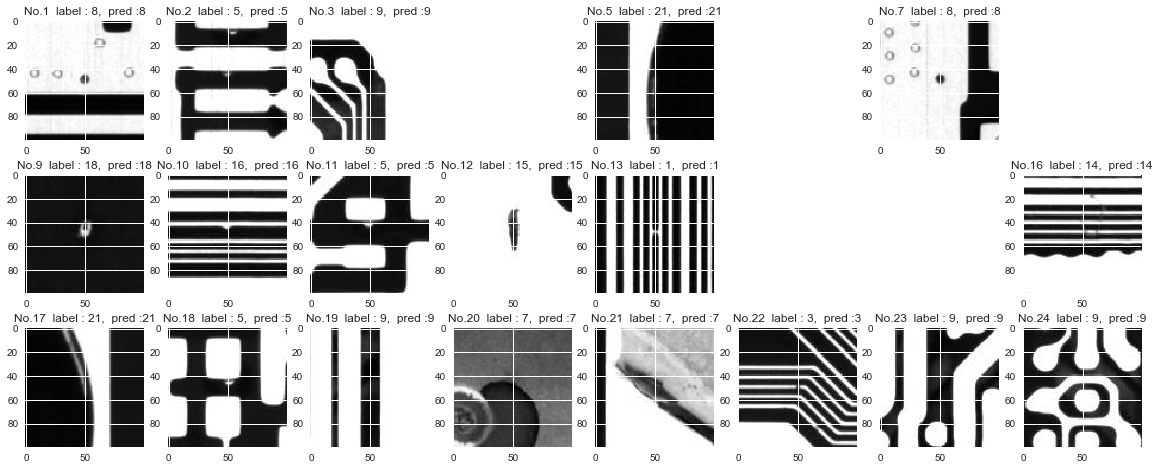

Error 2


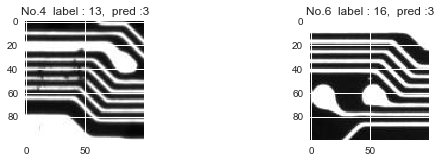

Error 1


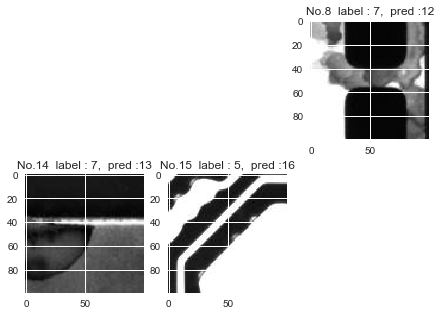

In [33]:
num_image = image.shape[0]
num_col = 8
a = num_image // num_col
# plt.figure(figsize = (20, 8))

print('OK')
plt.figure(figsize = (20, 8))
for i in range(num_image):
    if np.argmax(label[i],-1) == np.argmax(logits[i],-1):
        plt.subplot(a, num_col,i+1)
        plt.title('No.'+str(i+1)+'  label : '+ str(np.argmax(label[i],-1))+',  pred :' + str(np.argmax(logits[i],-1)))
        plt.imshow(image[i, :, :,0], cmap='gray')
plt.show()

print('Error 2')
plt.figure(figsize = (20, 8))
for i in range(num_image):
    if np.argmax(label[i],-1) > np.argmax(logits[i],-1):
        plt.subplot(a, num_col,i+1)
        plt.title('No.'+str(i+1)+'  label : '+ str(np.argmax(label[i],-1))+',  pred :' + str(np.argmax(logits[i],-1)))
        plt.imshow(image[i, :, :,0], cmap='gray')
plt.show()

print('Error 1')
plt.figure(figsize = (20, 8))
for i in range(num_image):
    if np.argmax(label[i],-1) < np.argmax(logits[i],-1):
        plt.subplot(a, num_col,i+1)
        plt.title('No.'+str(i+1)+'  label : '+ str(np.argmax(label[i],-1))+',  pred :' + str(np.argmax(logits[i],-1)))
        plt.imshow(image[i, :, :,0], cmap='gray')
plt.show()

In [85]:
arr = confusion_matrix(np.argmax(logits, -1), np.argmax(label, -1))  # (tn, fp), (fn, tp)
arr

array([[90,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  3,  0,  4,  0,  0,
         1,  0,  2,  0,  0,  0],
       [ 0, 67,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  6,
         0,  0,  0,  0,  0,  0],
       [ 0,  1, 97,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  3,  2,  0,
         0,  0,  0,  0,  0,  0],
       [ 6,  0,  0, 94,  3,  0,  0,  1,  0,  0,  1,  0,  0, 11,  1,  0,
         7,  2,  2,  0,  0,  0],
       [ 0, 19,  0,  0, 53,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  2, 93,  0,  0,  0,  3,  1,  1,  0,  1,  0,  0,
         1,  3,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 98,  1,  0,  0,  0,  0,  0,  0,  0,  7,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 63,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 94,  0,  0,  0,  0,  3,  0,  1,
         0,  0,  0,  1,  0,  0],
       [ 0,  3,  0,  0, 17,  0,  0,  0,  0, 92,  6,  1,

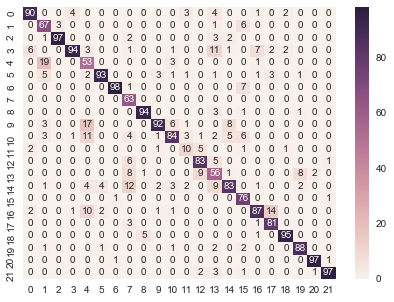

In [86]:
df_array1 = pd.DataFrame(arr)
plt.figure(figsize = (7,5))
sns.heatmap(df_array1, annot=True)
plt.show()